In [1]:
import os # Importamos la librería os para poder manipular archivos y directorios
from sklearn.model_selection import train_test_split # Importamos la librería train_test_split para poder dividir el dataset en entrenamiento y prueba
from shutil import copy2 # Importamos la librería copy2 para poder copiar archivos

def split_dataset(dataset_dir, output_dir, train_size=0.8): # Definimos la función split_dataset que recibe como parámetros el directorio del dataset, el directorio de salida y el tamaño del conjunto de entrenamiento
    classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))] # Obtenemos la lista de clases del dataset
    
    for class_name in classes: # Iteramos sobre cada clase
        class_path = os.path.join(dataset_dir, class_name) # Obtenemos la ruta de la clase
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)] # Obtenemos la lista de imágenes de la clase
        
        train_images, test_images = train_test_split(images, train_size=train_size) # Dividimos las imágenes en entrenamiento y prueba
        
        train_class_dir = os.path.join(output_dir, 'train', class_name) # Obtenemos la ruta del directorio de entrenamiento de la clase
        test_class_dir = os.path.join(output_dir, 'test', class_name) # Obtenemos la ruta del directorio de prueba de la clase
        
        os.makedirs(train_class_dir, exist_ok=True) # Creamos el directorio de entrenamiento de la clase
        os.makedirs(test_class_dir, exist_ok=True) # Creamos el directorio de prueba de la clase
        
        for img in train_images: # Iteramos sobre cada imagen de entrenamiento
            copy2(img, train_class_dir) # Copiamos la imagen en el directorio de entrenamiento de la clase
        
        for img in test_images: # Iteramos sobre cada imagen de prueba
            copy2(img, test_class_dir) # Copiamos la imagen en el directorio de prueba de la clase

dataset_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\dataset" # Definimos la ruta del directorio del dataset
output_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project" # Definimos la ruta del directorio de salida
split_dataset(dataset_dir, output_dir) # Llamamos a la función split_dataset

In [2]:
import torch # Importamos la librería torch para poder trabajar con redes neuronales
import torch.nn as nn # Importamos la librería nn para poder definir redes neuronales
import torch.optim as optim # Importamos la librería optim para poder definir optimizadores
from torchvision import datasets, transforms # Importamos las librerías datasets y transforms para poder trabajar con conjuntos de datos y transformaciones
from torch.utils.data import DataLoader # Importamos la librería DataLoader para poder cargar los datos
import os # Importamos la librería os para poder manipular archivos y directorios

# Transformaciones
transform = transforms.Compose([
    transforms.Resize((320, 320)),  # Redimensionar imágenes
    transforms.ToTensor(),  # Convertir imágenes a tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar: media 0.5, desviación estándar 0.5 por cada canal (RGB)
])

# Cargar los datos
train_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\train" # Definimos la ruta del directorio de entrenamiento
test_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\test" # Definimos la ruta del directorio de prueba

train_dataset = datasets.ImageFolder(train_dir, transform=transform) # Cargamos el conjunto de entrenamiento
test_dataset = datasets.ImageFolder(test_dir, transform=transform) # Cargamos el conjunto de prueba

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True) # Cargamos el conjunto de entrenamiento en un DataLoader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False) # Cargamos el conjunto de prueba en un DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [3]:
print(f"Número de imágenes en el conjunto de entrenamiento: {len(train_dataset)}")
print(f"Número de imágenes en el conjunto de prueba: {len(test_dataset)}")

# Imprimir todas las clases del conjunto de datos de entrenamiento
print("Clases en el conjunto de entrenamiento:")
print(train_dataset.classes)

Número de imágenes en el conjunto de entrenamiento: 60000
Número de imágenes en el conjunto de prueba: 15000
Clases en el conjunto de entrenamiento:
['chamaelobivia', 'hypoestes', 'lamium', 'rosario', 'sedum']


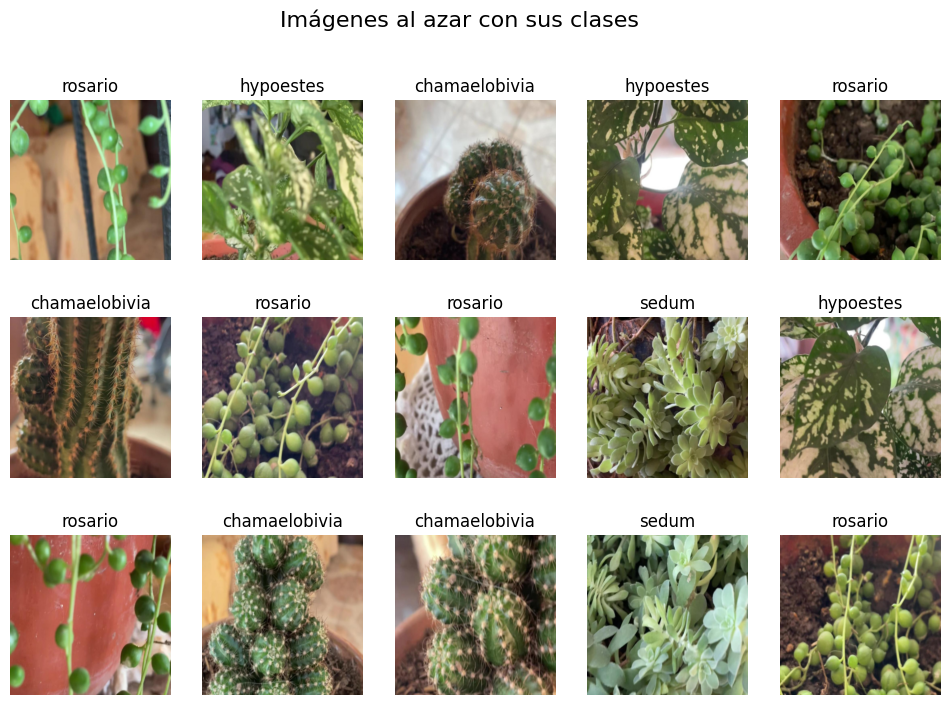

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Definimos una función para mostrar un grid de imágenes
def show_random_images(dataset, num_rows=3, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Creamos una figura con subplots
    fig.suptitle('Imágenes al azar con sus clases', fontsize=16)

    for i in range(num_rows):
        for j in range(num_cols):
            idx = np.random.randint(0, len(dataset))  # Seleccionamos un índice al azar
            img, label = dataset[idx]  # Obtenemos la imagen y la etiqueta
            img = img / 2 + 0.5  # Desnormalizamos la imagen
            np_img = img.numpy()  # Convertimos la imagen a un array de NumPy
            axes[i, j].imshow(np.transpose(np_img, (1, 2, 0)))  # Mostramos la imagen
            axes[i, j].set_title(dataset.classes[label])  # Mostramos la etiqueta
            axes[i, j].axis('off')  # Ocultamos los ejes

    plt.show()

# Visualizamos las imágenes al azar del conjunto de entrenamiento
show_random_images(train_dataset)

Mostrar Número de Imágenes, Resolución y Número de Canales

In [6]:
# Número de imágenes en los conjuntos de entrenamiento y prueba
print(f"Número de imágenes en el conjunto de entrenamiento: {len(train_dataset)}")
print(f"Número de imágenes en el conjunto de prueba: {len(test_dataset)}")

# Ver resolución y número de canales de una muestra de imagen
sample_image, _ = train_dataset[0]  # Tomamos la primera imagen del conjunto de entrenamiento
print(f"Resolución de la imagen (Altura x Ancho): {sample_image.shape[1]} x {sample_image.shape[2]}")
print(f"Número de canales: {sample_image.shape[0]}")


Número de imágenes en el conjunto de entrenamiento: 60000
Número de imágenes en el conjunto de prueba: 15000
Resolución de la imagen (Altura x Ancho): 320 x 320
Número de canales: 3


Test para encontrar el mejor Learning Rate

Crear un Subconjunto del Dataset

In [7]:
from torch.utils.data import Subset
import numpy as np

# Crear un subconjunto del dataset de entrenamiento (20% del total)
train_size = int(0.2 * len(train_dataset))
indices = np.random.choice(len(train_dataset), train_size, replace=False)
train_subset = Subset(train_dataset, indices)

# Crear DataLoader para el subconjunto
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)

In [8]:
len(train_subset) # Número de imágenes en el subconjunto

12000

In [9]:
from torch.utils.data import Subset
import numpy as np

# Crear un subconjunto del dataset de entrenamiento (20% del total)
train_size = int(0.2 * len(train_dataset))
indices = np.random.choice(len(train_dataset), train_size, replace=False)
train_subset = Subset(train_dataset, indices)

# Crear DataLoader para el subconjunto
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)

Modelo MLP

In [40]:
# Definición del MLP
class MLP(nn.Module): # Definimos la clase MLP que hereda de nn.Module
    def __init__(self): # Definimos el constructor de la clase
        super(MLP, self).__init__() # Llamamos al constructor de la clase padre
        self.flatten = nn.Flatten() # Aplanamos las imágenes
        self.fc1 = nn.Linear(320 * 320 * 3, 100)  # 32*32*3 entradas debido a los 3 canales RGB
        self.fc2 = nn.Linear(100, 100)  # Segunda capa oculta con 200 neuronas
        self.fc3 = nn.Linear(100, 50)   # Tercera capa oculta con 50 neuronas
        self.relu = nn.ReLU()           # Función de activación ReLU
        self.fc4 = nn.Linear(50, 5)     # Capa de salida con 5 neuronas (5 clases)


    def forward(self, x): # Definimos el método forward que recibe como parámetro las imágenes 
      
        x = self.flatten(x) # Aplanamos las imágenes
        x = self.fc1(x) # Primera capa oculta
        x = self.relu(x) # Función de activación ReLU
        x = self.fc2(x) # Segunda capa oculta
        x = self.relu(x) # Función de activación ReLU
        x = self.fc3(x) # Tercera capa oculta
        x = self.relu(x) # Función de activación ReLU
        x = self.fc4(x) # Capa de salida
        return x # x es la probabilidad de que la imagen pertenezca a cada clase

model = MLP().to(device) # Instanciamos el modelo MLP

Entrenamiento con Tasa de Aprendizaje Variable

Iter 1/100, Loss: 1.5977318286895752, LR: 1.023292992280754e-07
Iter 2/100, Loss: 1.622931718826294, LR: 1.0471285480508996e-07
Iter 3/100, Loss: 1.6155765056610107, LR: 1.0715193052376064e-07
Iter 4/100, Loss: 1.578639030456543, LR: 1.096478196143185e-07
Iter 5/100, Loss: 1.6028337478637695, LR: 1.1220184543019633e-07
Iter 6/100, Loss: 1.628727912902832, LR: 1.1481536214968827e-07
Iter 7/100, Loss: 1.631130576133728, LR: 1.1748975549395294e-07
Iter 8/100, Loss: 1.6033934354782104, LR: 1.202264434617413e-07
Iter 9/100, Loss: 1.6234303712844849, LR: 1.2302687708123815e-07
Iter 10/100, Loss: 1.612703800201416, LR: 1.2589254117941672e-07
Iter 11/100, Loss: 1.6188007593154907, LR: 1.288249551693134e-07
Iter 12/100, Loss: 1.6161112785339355, LR: 1.318256738556407e-07
Iter 13/100, Loss: 1.6104758977890015, LR: 1.3489628825916535e-07
Iter 14/100, Loss: 1.5929455757141113, LR: 1.3803842646028847e-07
Iter 15/100, Loss: 1.6057777404785156, LR: 1.4125375446227544e-07
Iter 16/100, Loss: 1.61033749

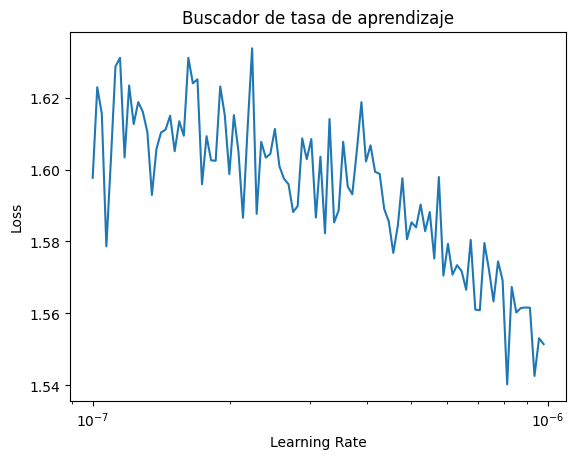

In [41]:
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt

# Definir el optimizador
optimizer = optim.Adam(model.parameters(), lr=1e-7)  # Comenzar con un learning rate muy pequeño
criterion = nn.CrossEntropyLoss()

# Implementar el aprendizaje con tasa de aprendizaje variable
def find_lr(model, train_loader, criterion, optimizer, num_iters=100):
    lrs = []
    losses = []
    best_loss = float('inf')
    best_lr = None  # Variable para almacenar el mejor learning rate

    # Scheduler para incrementar el learning rate en cada batch
    scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 10**(epoch / num_iters))

    model.train()
    for i, (images, labels) in enumerate(train_loader):
        if i >= num_iters:
            break

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Guardar la pérdida y el learning rate actual
        lrs.append(scheduler.get_last_lr()[0])
        losses.append(loss.item())

        # Guardar el mejor valor de pérdida y el correspondiente learning rate
        if loss.item() < best_loss:
            best_loss = loss.item()
            best_lr = scheduler.get_last_lr()[0]  # Guardar el mejor learning rate

        # Actualizar el scheduler
        scheduler.step()

        print(f"Iter {i+1}/{num_iters}, Loss: {loss.item()}, LR: {scheduler.get_last_lr()[0]}")

    print(f"Mejor Learning Rate encontrado: {best_lr}")
    return lrs, losses, best_lr

# Ejecutar la búsqueda del learning rate
lrs, losses, best_lr = find_lr(model, train_loader, criterion, optimizer, num_iters=100)

# Graficar la pérdida en función del learning rate
plt.plot(lrs, losses)
plt.xscale('log')  # Usar escala logarítmica en el eje de tasas de aprendizaje
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Buscador de tasa de aprendizaje')
plt.show()

# Guardar el mejor learning rate en un archivo
with open("best_learning_rate.txt", "w") as f:
    f.write(f"Mejor Learning Rate encontrado: {best_lr}\n")

In [42]:
print(f"Mejor Learning Rate encontrado: {best_lr}")

Mejor Learning Rate encontrado: 8.128305161640993e-07


Modelo MLP con el mejor LR

In [44]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True) # Cargamos el conjunto de entrenamiento en un DataLoader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False) # Cargamos el conjunto de prueba en un DataLoader

print(f"Número de imágenes en el conjunto de entrenamiento: {len(train_dataset)}")
print(f"Número de imágenes en el conjunto de prueba: {len(test_dataset)}")

# Imprimir todas las clases del conjunto de datos de entrenamiento
print("Clases en el conjunto de entrenamiento:")
print(train_dataset.classes)

Número de imágenes en el conjunto de entrenamiento: 60000
Número de imágenes en el conjunto de prueba: 15000
Clases en el conjunto de entrenamiento:
['chamaelobivia', 'hypoestes', 'lamium', 'rosario', 'sedum']


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

# Detectar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Definición del MLP
class MLP(nn.Module): # Definimos la clase MLP que hereda de nn.Module
    def __init__(self): # Definimos el constructor de la clase
        super(MLP, self).__init__() # Llamamos al constructor de la clase padre
        self.flatten = nn.Flatten() # Aplanamos las imágenes

        # Capa 1 con Batch Normalization y Dropout
        self.fc1 = nn.Linear(320 * 320 * 3, 512)  # imágenes de 320x320 RGB
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.3)  # Dropout con probabilidad del 30%

        # Capa 2 con Batch Normalization y Dropout
        self.fc2 = nn.Linear(512, 256)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.3)

        # Capa 3 con Batch Normalization y Dropout
        self.fc3 = nn.Linear(256, 128)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.3)


        ## Capa de salida
        self.fc4 = nn.Linear(128, 5)  # 5 clases en la salida
        
        self.relu = nn.ReLU()


    def forward(self, x): # Definimos el método forward que recibe como parámetro las imágenes 
      
        x = self.flatten(x)

        # Primera capa
        x = self.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout1(x)

        # Segunda capa
        x = self.relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout2(x)

        # Tercera capa
        x = self.relu(self.batch_norm3(self.fc3(x)))
        x = self.dropout3(x)

        # Capa de salida
        x = self.fc4(x)
        return x # x es la probabilidad de que la imagen pertenezca a cada clase

model = MLP().to(device) # Instanciamos el modelo MLP

# Definición de la función de pérdida y el optimizador con regularización L2 (weight decay)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=1e-4)

# Parámetros de entrenamiento
epochs = 1000 # Número de épocas
checkpoint_interval = 20 # Guardar el modelo cada 20 épocas
patience = 20  # Número de épocas para early stopping sin mejora
best_accuracy = 0 # Mejor precisión en el conjunto de prueba
epochs_no_improve = 0 # Número de épocas sin mejora 
early_stop = False # Bandera para indicar si se debe hacer early stopping

# Checkpoint Directory
checkpoint_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\models\checkpoints" # Definimos la ruta del directorio de checkpoints
os.makedirs(checkpoint_dir, exist_ok=True) # Creamos el directorio de checkpoints

Entrenamiento y Checkpoints

In [47]:
# Función de entrenamiento y checkpoints con Early Stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs, checkpoint_interval, patience):
    global best_accuracy, epochs_no_improve, early_stop

    for epoch in range(epochs):
        if early_stop:
            print(f"Early stopping en la época {epoch}")
            break

        model.train()
        running_loss = 0.0

        # Entrenamiento
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a CUDA
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

        # Guardar checkpoints
        if (epoch + 1) % checkpoint_interval == 0:
            checkpoint_path = os.path.join(checkpoint_dir, f"mlp_epoch_{epoch+1}.pth")
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Checkpoint guardado en {checkpoint_path}")

        # Evaluación en el conjunto de prueba
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)  # Mover datos a CUDA
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f"Precisión en test: {accuracy * 100:.2f}%")

        # Early Stopping: Comprobar si la precisión mejora
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
            print(f"Mejora encontrada: Precisión: {best_accuracy * 100:.2f}%")
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping en la época {epoch+1} debido a no mejora en {patience} épocas.")
            early_stop = True

# Llama a la función de entrenamiento
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=1000, checkpoint_interval=20, patience=patience)

Epoch 1/1000, Loss: 1.145021839309603
Precisión en test: 79.86%
Mejora encontrada: Precisión: 79.86%
Epoch 2/1000, Loss: 0.9211021187717218
Precisión en test: 86.59%
Mejora encontrada: Precisión: 86.59%
Epoch 3/1000, Loss: 0.8288436205402366
Precisión en test: 89.55%
Mejora encontrada: Precisión: 89.55%
Epoch 4/1000, Loss: 0.7657024048284681
Precisión en test: 91.40%
Mejora encontrada: Precisión: 91.40%
Epoch 5/1000, Loss: 0.7148226884636544
Precisión en test: 92.54%
Mejora encontrada: Precisión: 92.54%
Epoch 6/1000, Loss: 0.671208859252523
Precisión en test: 93.66%
Mejora encontrada: Precisión: 93.66%
Epoch 7/1000, Loss: 0.6333943736324432
Precisión en test: 94.50%
Mejora encontrada: Precisión: 94.50%
Epoch 8/1000, Loss: 0.5983145632215147
Precisión en test: 95.01%
Mejora encontrada: Precisión: 95.01%
Epoch 9/1000, Loss: 0.5658711927658968
Precisión en test: 95.38%
Mejora encontrada: Precisión: 95.38%
Epoch 10/1000, Loss: 0.537106783278207
Precisión en test: 95.79%
Mejora encontrada: 

KeyboardInterrupt: 

CONTINUANDO ENTRENAMIENTO CON EL ULTIMO CHECKPOINT

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformaciones
transform = transforms.Compose([
    transforms.Resize((320, 320)),  # Redimensionar a 32x32 píxeles
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar: media 0.5, desviación estándar 0.5 por cada canal
])

# Directorios del dataset
train_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\train"
test_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\test"

# Cargar los datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Crear DataLoader para entrenamiento y prueba
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

# Definir el MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 3, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 50)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(50, 5)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instancia del modelo
model = MLP().to(device)


# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Checkpoint Directory
checkpoint_dir = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\models\checkpoints" # Definimos la ruta del directorio de checkpoints
os.makedirs(checkpoint_dir, exist_ok=True) # Creamos el directorio de checkpoints


In [11]:
# Función de entrenamiento que guarda checkpoints
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs, checkpoint_interval, start_epoch=0):
    for epoch in range(start_epoch, start_epoch + epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
        
        # Guardar checkpoints
        # if (epoch + 1) % checkpoint_interval == 0:
        #     checkpoint_path = os.path.join("models/checkpoints", f"mlp_epoch_{epoch+1}.pth")
        #     torch.save({
        #         'epoch': epoch,
        #         'model_state_dict': model.load_state_dict(),
        #         'optimizer_state_dict': optimizer.load_state_dict(),
        #     }, checkpoint_path)
        #     print(f"Checkpoint guardado en {checkpoint_path}")

        # Guardar checkpoints
        if (epoch + 1) % checkpoint_interval == 0: # Si la época actual es un múltiplo del intervalo para guardar checkpoints
            checkpoint_path = os.path.join(checkpoint_dir, f"mlp_epoch_{epoch+1}.pth") # Definimos la ruta del checkpoint
            torch.save(model.state_dict(), checkpoint_path) # Guardamos el modelo
            print(f"Checkpoint guardado en {checkpoint_path}") # Imprimimos la ruta del checkpoint guardado
        
        # Evaluar el modelo en el conjunto de prueba
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f"Precisión en test: {accuracy * 100:.2f}%")

In [12]:
# Cargar el último checkpoint
checkpoint_path = r"C:\NC\Universidad\6° Semestre\SIS421 (INTELIGENCIA ARTIFICIAL II)\Notebooks\medicinal_plants_project\models\checkpoints\mlp_epoch_280.pth"  # Cambia al nombre de tu último checkpoint
model.load_state_dict(torch.load(checkpoint_path))

optimizer = optim.Adam(model.parameters(), lr=0.001)

start_epoch = 280

print(f"Entrenamiento reanudado desde la época {start_epoch}")

# Continuar el entrenamiento desde la última época guardada
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=1000 - start_epoch, checkpoint_interval=20, start_epoch=start_epoch)

C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_5752\487425110.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))


Entrenamiento reanudado desde la época 280
Epoch 281, Loss: 0.019895118556619136
Precisión en test: 99.85%


KeyboardInterrupt: 

Exportación a TorchScript

In [ ]:
import torch

# Exportar el modelo a TorchScript
torchscript_model = torch.jit.script(model)

# Guardar el modelo TorchScript
torchscript_model.save("model_mlp_torchscript.pt")


Exportación a ONNX

In [ ]:
# Dummy input para el trazado del modelo
dummy_input = torch.randn(1, 1, 32, 32)  # Cambia según el tamaño de la entrada de tu modelo

# Exportar el modelo a ONNX
torch.onnx.export(
    model,                   # El modelo PyTorch entrenado
    dummy_input,             # Una entrada ficticia para definir la forma de entrada
    "model_mlp.onnx",        # Nombre del archivo de salida
    input_names=["input"],   # Nombres de las entradas
    output_names=["output"], # Nombres de las salidas
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},  # Para soportar batch sizes dinámicos
    opset_version=11         # Versión del conjunto de operaciones ONNX
)



NameError: name 'torch' is not defined

Verificación de la Exportación

TorchScript:

In [ ]:
# Cargar el modelo TorchScript y verificar
loaded_torchscript_model = torch.jit.load("model_mlp_torchscript.pt")
# Realizar una inferencia de prueba
output = loaded_torchscript_model(dummy_input)
print(output)

tensor([[-40.1481, -29.5365, -24.5178,  -0.7325, -41.5987]],
       grad_fn=<AddmmBackward0>)


ONNX:

In [ ]:
import onnx
import onnxruntime as ort

# Cargar y verificar el modelo ONNX
onnx_model = onnx.load("model_mlp.onnx")
onnx.checker.check_model(onnx_model)

# Usar ONNX Runtime para inferencia
ort_session = ort.InferenceSession("model_mlp.onnx")

# Realizar una inferencia de prueba
onnx_output = ort_session.run(
    None, {"input": dummy_input.numpy()}
)
print(onnx_output)